Explorary data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('data/Musquash_MPA_Benthos_Infauna.csv', encoding='latin1')
df2 = pd.read_csv('data/Musquash_MPA_Sediment_Grain_Size.csv', encoding='latin1')
df3 = pd.read_csv('data/Musquash_MPA_Sediment_Loss_Ignition.csv', encoding='latin1')
df4 = pd.read_csv('data/Musquash_MPA_Set_Data.csv', encoding='latin1')

In [3]:
# from ydata_profiling import ProfileReport

# # Generate data quality reports for each dataset
# profile_df1 = ProfileReport(df1, title="Data Quality Report for df1", explorative=True)
# profile_df2 = ProfileReport(df2, title="Data Quality Report for df2", explorative=True)
# profile_df3 = ProfileReport(df3, title="Data Quality Report for df3", explorative=True)
# profile_df4 = ProfileReport(df4, title="Data Quality Report for df4", explorative=True)

# # Save the reports as HTML files
# profile_df1.to_file("data_quality_report_df1.html")
# profile_df2.to_file("data_quality_report_df2.html")
# profile_df3.to_file("data_quality_report_df3.html")
# profile_df4.to_file("data_quality_report_df4.html")

    station   total_count  tot_wt_g
0         1  18088.000000    6407.0
1         2  13647.666667    6196.0
2         3  16161.000000    4307.0
3         4  17850.000000    5947.0
4         5  11089.000000    6531.0
5         6  18532.000000    6418.0
6         7  15583.000000    5996.0
7         8  35551.714286    6818.0
8         9  21886.571429    5809.0
9        10  27421.333333    5912.0
10       11  22058.000000    1768.0
11       12  12323.000000    1811.0
12       13  12313.000000    5132.0
13       14  17211.000000    1868.0
14       15   8941.000000    6733.0
15       16  16631.000000    1808.0
16       17  10715.000000    1189.0
17       18  11083.000000    6403.0
18       19   9000.000000    1160.0
19       20  16883.000000    2445.0
20       21   4257.000000    1058.0
21       22  24086.000000    4938.0
22       23   5665.000000    4051.0
23       24   7006.000000    3515.0
24       25  22446.000000    4777.0
25       26   8907.000000    4782.0
26       27  28513.000000   

C:\Users\CPK\AppData\Local\Temp\ipykernel_17644\1107968711.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=station_summary, x='station', y='total_count', palette='Blues')


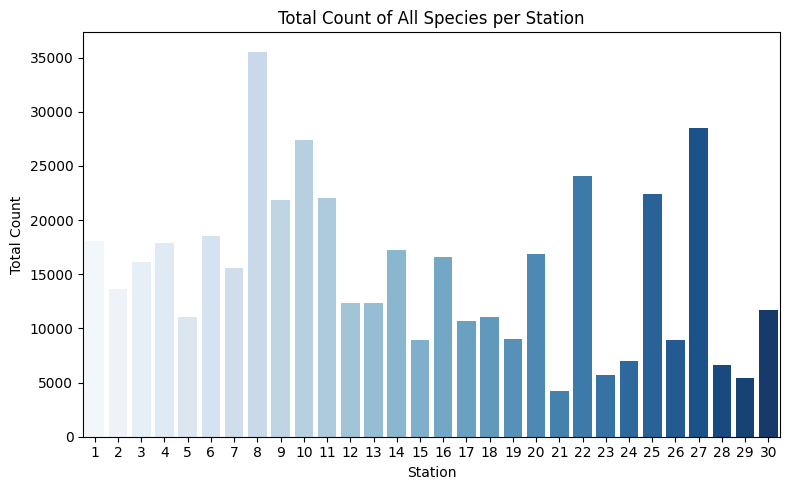

C:\Users\CPK\AppData\Local\Temp\ipykernel_17644\1107968711.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=station_summary, x='station', y='tot_wt_g', palette='Greens')


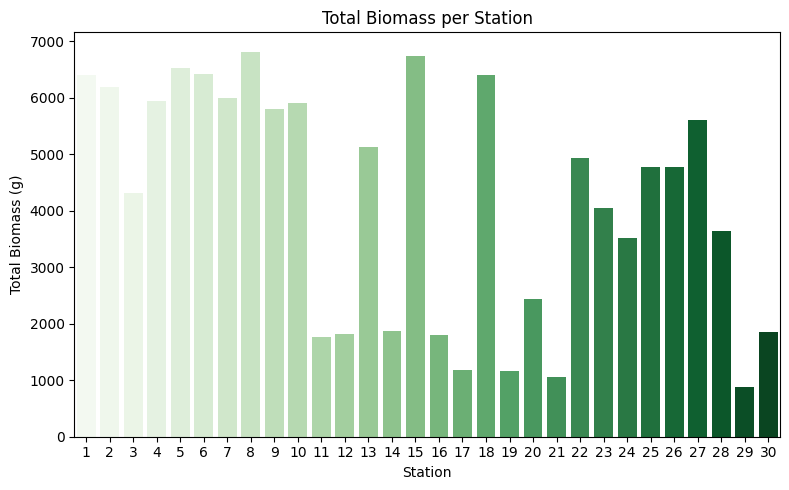

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by station to get total species count and total biomass per station
station_summary = df1.groupby('station').agg({
    'total_count': 'sum',   # Total number of individuals across all species
    'tot_wt_g': 'first'     # Total biomass for the station (same across species)
}).reset_index()

# Display the summary table
print(station_summary)

# Visualize total count per station
plt.figure(figsize=(8, 5))
sns.barplot(data=station_summary, x='station', y='total_count', palette='Blues')
plt.title('Total Count of All Species per Station')
plt.xlabel('Station')
plt.ylabel('Total Count')
plt.tight_layout()
plt.show()

# Visualize total biomass per station
plt.figure(figsize=(8, 5))
sns.barplot(data=station_summary, x='station', y='tot_wt_g', palette='Greens')
plt.title('Total Biomass per Station')
plt.xlabel('Station')
plt.ylabel('Total Biomass (g)')
plt.tight_layout()
plt.show()

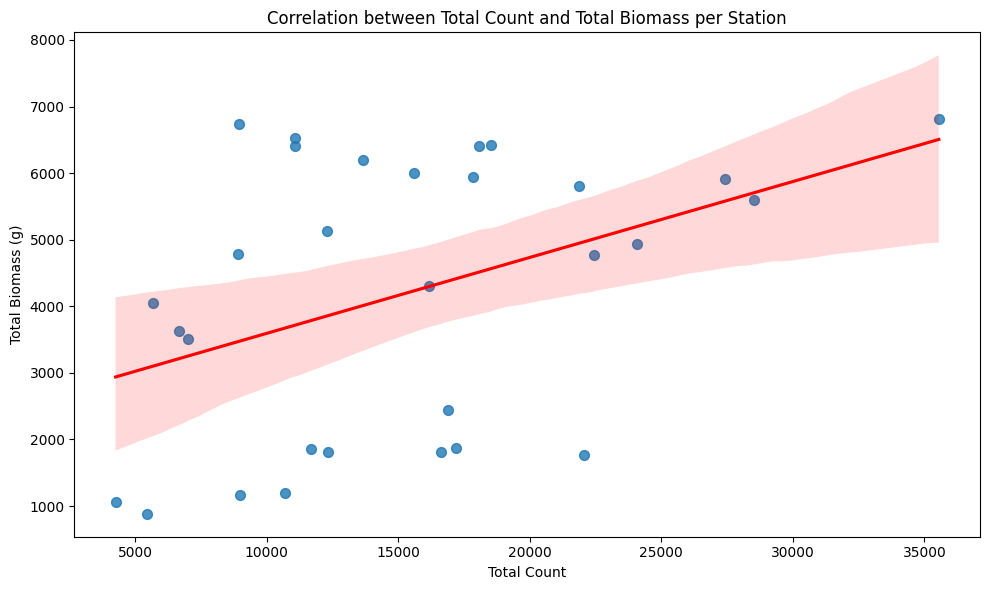

In [5]:
# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=station_summary, x='total_count', y='tot_wt_g', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Correlation between Total Count and Total Biomass per Station')
plt.xlabel('Total Count')
plt.ylabel('Total Biomass (g)')
plt.tight_layout()
plt.show()

In [6]:
station_data = df1[(df1['station'] == 2) & (df1['total_count'] > 0)]

C:\Users\CPK\AppData\Local\Temp\ipykernel_17644\1826387821.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_species, x='scientificName_Nom_scientifique', y='total_count', palette='viridis', ci=None)
C:\Users\CPK\AppData\Local\Temp\ipykernel_17644\1826387821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_species, x='scientificName_Nom_scientifique', y='total_count', palette='viridis', ci=None)


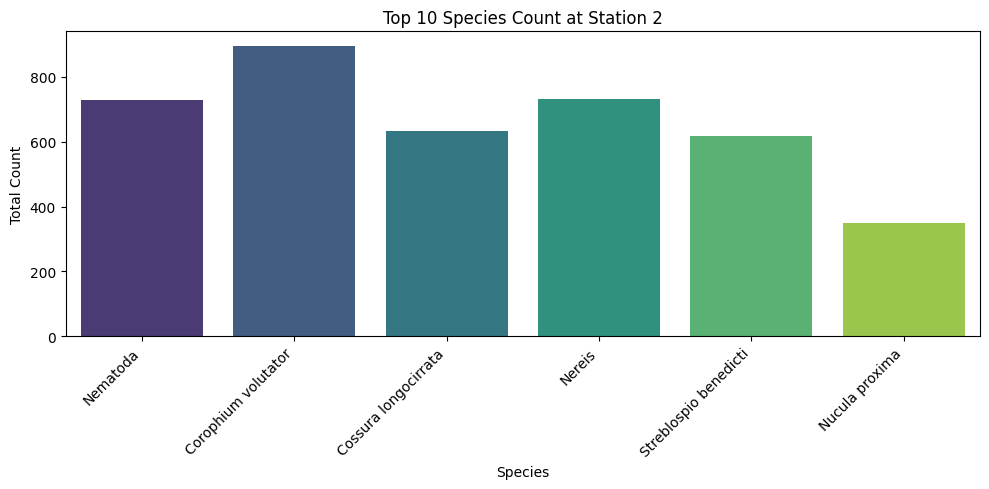

In [7]:
# Display top 10 most abundant species at Station 1
top_species = station_data.nlargest(10, 'total_count')

plt.figure(figsize=(10, 5))
sns.barplot(data=top_species, x='scientificName_Nom_scientifique', y='total_count', palette='viridis', ci=None)
plt.title('Top 10 Species Count at Station 2')
plt.xlabel('Species')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()